# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import GradientBoostingRegressor

# ------- Deep Learning -------#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# ------- Deep Learning -------#

# --- API ---#
from flask import Flask
# --- API ---#




import os
os.chdir(r"../Functions/")



# ------- My Libraries -------#
import All_Func
# ------- My Libraries -------#

---
* Extract Data

In [2]:
df = pd.read_csv('C:/Users/voudo/OneDrive/Υπολογιστής/Diploma/Data/Data.csv', index_col='Open time')
df.head()

,BTCBUSD_Open,BTCBUSD_High,BTCBUSD_Low,BTCBUSD_Close,BTCBUSD_Volume,ETHBUSD_Open,ETHBUSD_High,ETHBUSD_Low,ETHBUSD_Close,ETHBUSD_Volume,BNBBUSD_Open,BNBBUSD_High,BNBBUSD_Low,BNBBUSD_Close,BNBBUSD_Volume
Open time,,,,,,,,,,,,,,,
2020-01-01,7169.12,7231.86,7151.58,7176.58,93.548672,128.54,132.51,128.43,130.35,332.00567,13.6292,13.8192,13.5944,13.6794,1409.82
2020-01-02,7177.13,7185.03,6900.00,6945.33,311.705653,129.88,129.88,126.01,126.87,356.02846,13.6365,13.6730,12.9481,12.9863,1093.52
2020-01-03,6944.41,7393.50,6853.79,7329.20,655.633576,127.02,134.63,125.70,133.75,969.80025,12.9544,13.7340,12.9334,13.6024,3560.60
2020-01-04,7330.91,7388.00,7263.55,7346.20,299.060756,134.20,135.52,132.38,134.17,601.44372,13.6014,13.8441,13.4546,13.7666,1802.28
2020-01-05,7346.20,7486.66,7315.00,7351.42,363.286518,134.26,137.99,134.26,134.99,1902.27915,13.7799,14.2921,13.7745,14.0176,10856.00


<AxesSubplot:title={'center':'Correlation of Crypto columns'}>

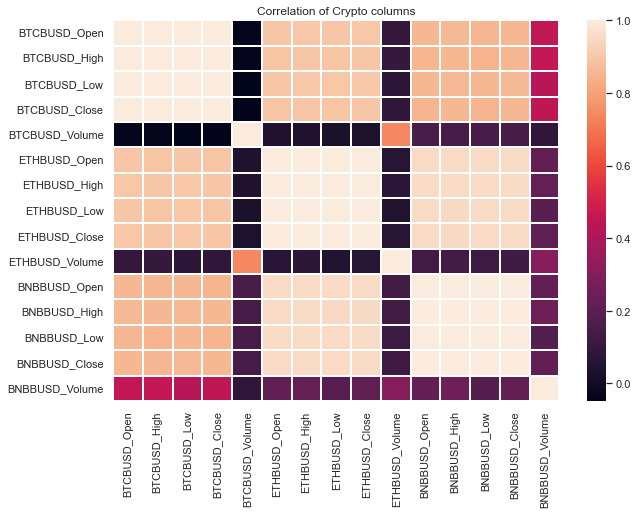

In [3]:
sns.set(rc = {'figure.figsize':(10,7)})
plt.title('Correlation of Crypto columns')
sns.heatmap(df.corr(),
            annot=False,
            linewidths = 0.3)

* Select the Target column

In [4]:
All_Func.Select_Target(dataframe=df)
df.dropna(inplace=True) #Drop null values of DataFrame

Choice the Target!
0 :  BTCBUSD_Open
1 :  BTCBUSD_High
2 :  BTCBUSD_Low
3 :  BTCBUSD_Close
4 :  BTCBUSD_Volume
5 :  ETHBUSD_Open
6 :  ETHBUSD_High
7 :  ETHBUSD_Low
8 :  ETHBUSD_Close
9 :  ETHBUSD_Volume
10 :  BNBBUSD_Open
11 :  BNBBUSD_High
12 :  BNBBUSD_Low
13 :  BNBBUSD_Close
14 :  BNBBUSD_Volume
Choice the targert: 3


* Split the DataFrame

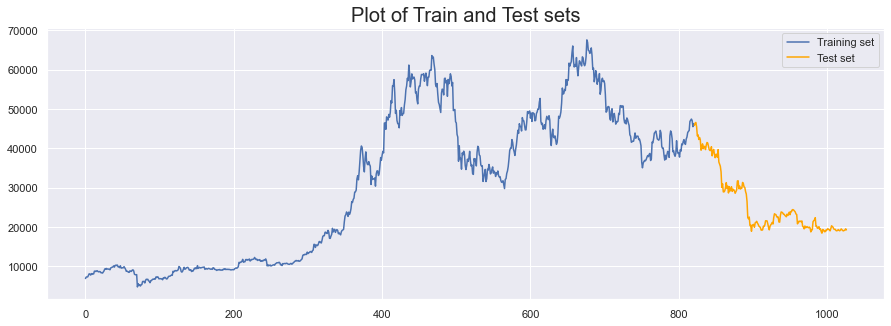

In [5]:
X_train, X_test, y_train, y_test = All_Func.train_test_split_df(dataframe=df, t_size=0.2, shuff=False)

---
* Use Models to Forecast
# Linear Regression Model

The model is:  LinearRegression() 

--- Evaluation of the Model (Root Mean Square Error) ---
RMSE for Train-Set is:  1363.1287569559888
RMSE for Test-Set is:  1734.7187845291878


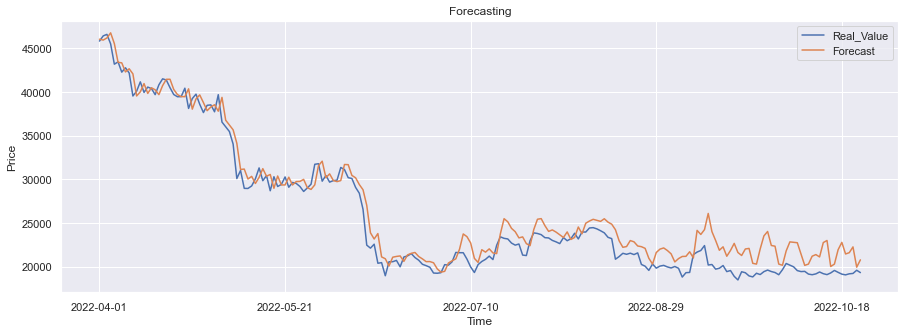

In [6]:
lr = LinearRegression()
lr_df = All_Func.Eval_Model(model=lr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [7]:
lr_df

,Real_Value,Forecast
Open time,,
2022-04-01,45825.73,46040.957178
2022-04-02,46420.23,45941.503046
2022-04-03,46594.23,46184.305825
2022-04-04,45506.78,46768.028011
2022-04-05,43177.71,45540.771829
...,...,...
2022-10-19,19041.73,21437.339187
2022-10-20,19164.41,21583.068458
2022-10-21,19205.39,22246.246120


<BarContainer object of 15 artists>

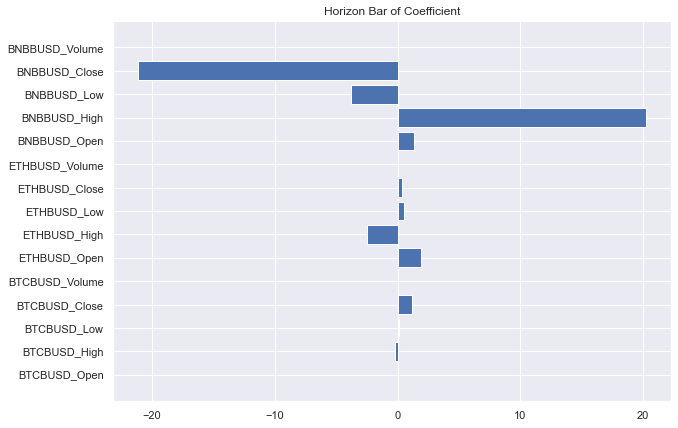

In [12]:
plt.figure(figsize=(10,7))
plt.title("{}\n\nHorizon Bar of Coefficient".format(lr))
plt.barh(lr.feature_names_in_, lr.coef_,)

# Decision Tree Regressor Model

* By Default Parameters

The model is:  DecisionTreeRegressor() 

--- Evaluation of the Model (Root Mean Square Error) ---
RMSE for Train-Set is:  0.0
RMSE for Test-Set is:  6789.2535297953655


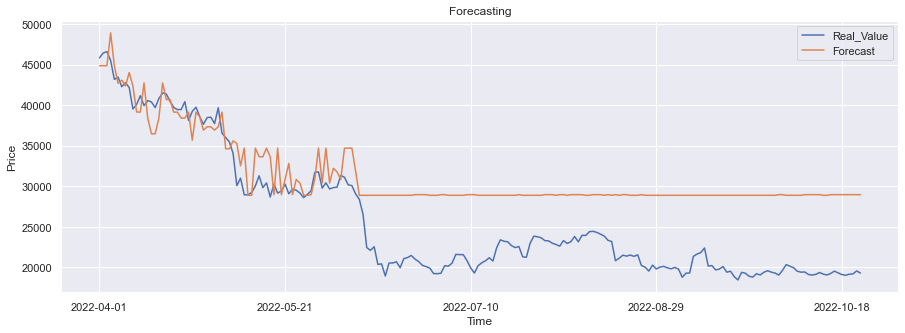

In [13]:
dt = DecisionTreeRegressor()
dt_df = All_Func.Eval_Model(model=dt, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [14]:
dt_df

,Real_Value,Forecast
Open time,,
2022-04-01,45825.73,44857.81
2022-04-02,46420.23,44857.81
2022-04-03,46594.23,44857.81
2022-04-04,45506.78,48905.71
2022-04-05,43177.71,44857.81
...,...,...
2022-10-19,19041.73,28969.01
2022-10-20,19164.41,28969.01
2022-10-21,19205.39,28969.01


* Tuning

In [51]:
dt = DecisionTreeRegressor(criterion = 'friedman_mse')

grid_search = GridSearchCV(dt,
                           {
                               'max_depth' : np.arange(2,8,1),
                               'min_samples_split' : np.arange(0.1, 1.0, 0.1),
                               'min_samples_leaf' : np.arange(0.1, 0.6, 0.1),
                               'ccp_alpha' : np.arange(0.0, 0.8, 0.1)
                            }, cv=2, verbose=1, n_jobs=2)
grid_search.fit(X_train,y_train)
print('Model: ', dt, '\nThe best parameter of Tuning is: ', grid_search.best_params_)

Fitting 2 folds for each of 2160 candidates, totalling 4320 fits
Model:  DecisionTreeRegressor(criterion='friedman_mse') 
The best parameter of Tuning is:  {'ccp_alpha': 0.30000000000000004, 'max_depth': 4, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}


The model is:  DecisionTreeRegressor(ccp_alpha=0.3, criterion='friedman_mse', max_depth=7,
                      min_samples_leaf=0.1, min_samples_split=0.1) 

--- Evaluation of the Model (Root Mean Square Error) ---
RMSE for Train-Set is:  2588.489834367752
RMSE for Test-Set is:  12780.374688488439


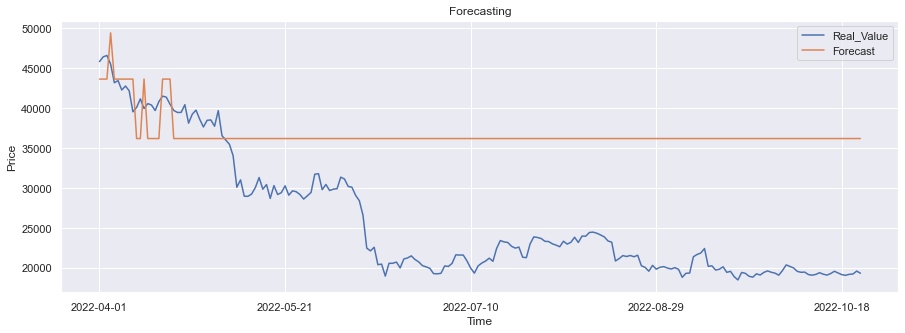

In [52]:
dt = DecisionTreeRegressor(criterion = 'friedman_mse',
                           ccp_alpha = 0.3,
                           max_depth = 7,
                           min_samples_leaf = 0.1,
                           min_samples_split = 0.1) 

dt_df = All_Func.Eval_Model(model=dt, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

<BarContainer object of 15 artists>

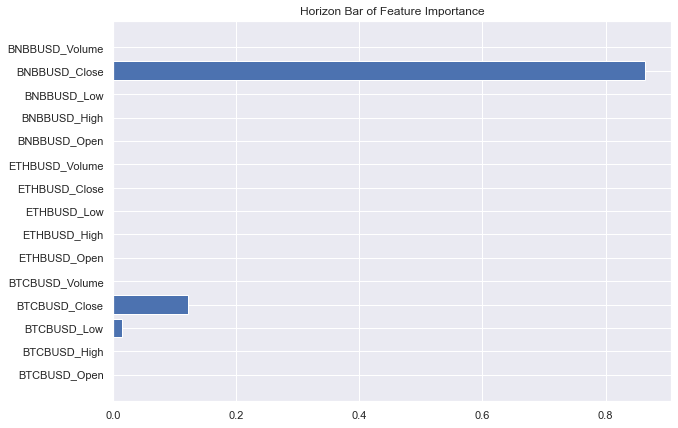

In [53]:
plt.figure(figsize=(10,7))
plt.title("{}\n\nHorizon Bar of Feature Importance".format(dt))
plt.barh(dt.feature_names_in_, dt.feature_importances_)

* Optimize Tree

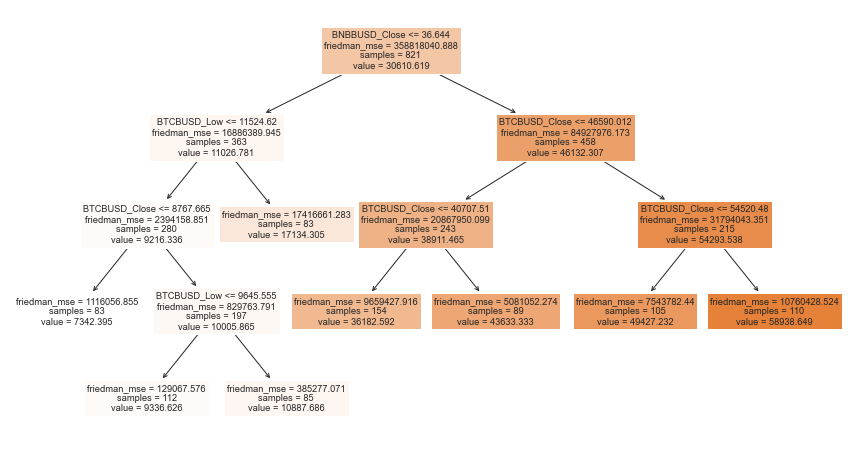

In [65]:
fig = plt.figure(figsize=(15,8))
_ = plot_tree(dt,
              feature_names = dt.feature_names_in_,
              filled = True)

# GradientBoostingRegressor
* Default Parameters

The model is:  GradientBoostingRegressor() 

--- Evaluation of the Model (Root Mean Square Error) ---
RMSE for Train-Set is:  893.8529575405595
RMSE for Test-Set is:  2479.5857069690974


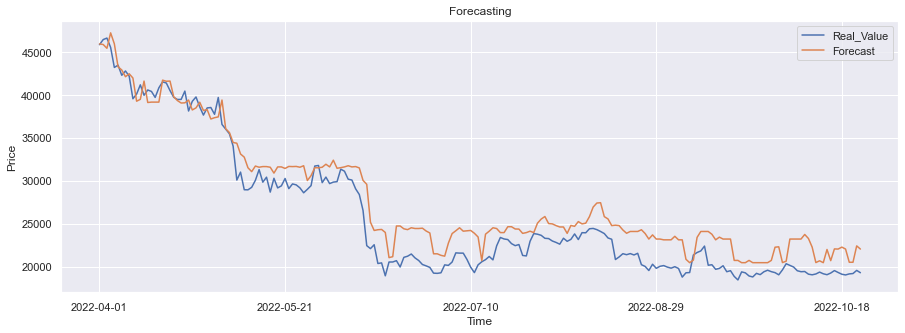

In [19]:
gbr = GradientBoostingRegressor(loss = 'squared_error',
                                criterion = 'friedman_mse')
gbr_df = All_Func.Eval_Model(model=gbr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

In [20]:
gbr_df

,Real_Value,Forecast
Open time,,
2022-04-01,45825.73,45911.813755
2022-04-02,46420.23,45845.295183
2022-04-03,46594.23,45403.529992
2022-04-04,45506.78,47200.580871
2022-04-05,43177.71,45926.491756
...,...,...
2022-10-19,19041.73,22052.837258
2022-10-20,19164.41,20517.657848
2022-10-21,19205.39,20517.657848


* Tuning

In [ ]:
gbr = GradientBoostingRegressor(loss = 'squared_error',
                                criterion = 'friedman_mse',
                                subsample = 1.0,
                                warm_start = True,
                                verbose = 1)

grid_search = GridSearchCV(gbr,
                           {
                               'learning_rate' : [0.1, 0.2, 0.3],
                               'n_estimators' : np.arange(100, 1000, 100),
                               'subsample' : np.arange(0.9, 1.1, 0.1),
                               'min_samples_split' : np.arange(0.1, 1.0, 0.3),
                               'min_samples_leaf' : np.arange(0.1, 0.6, 0.1),
                               'max_depth' : np.arange(3, 8, 1)
                            }, cv=2, verbose=1, n_jobs=2)
grid_search.fit(X_train,y_train)
print('Model: ', gbr, '\nThe best parameter of Tuning is: ', grid_search.best_params_)

Fitting 2 folds for each of 14850 candidates, totalling 29700 fits


The model is:  GradientBoostingRegressor(learning_rate=0.3, min_samples_leaf=0.1,
                          min_samples_split=0.4, n_estimators=900, subsample=1,
                          verbose=1, warm_start=True) 

      Iter       Train Loss   Remaining Time 
         1   184531577.0205            2.27s
         2    96670429.9830            2.62s
         3    51131462.0157            2.49s
         4    27466656.9447            2.59s
         5    15698473.4613            2.43s
         6     9634845.9067            2.50s
         7     6483130.0741            2.59s
         8     4668510.6154            2.53s
         9     3827220.3105            2.48s
        10     3338316.7416            2.50s
        20     2500633.5867            2.55s
        30     2272488.0104            2.63s
        40     2131156.0138            2.58s
        50     2023687.8432            2.55s
        60     1923669.5237            2.51s
        70     1849308.7737            2.48s
        80     1

,Real_Value,Forecast
Open time,,
2022-04-01,45825.73,46195.480492
2022-04-02,46420.23,44407.117317
2022-04-03,46594.23,44831.151431
2022-04-04,45506.78,49402.232113
2022-04-05,43177.71,46873.946741
...,...,...
2022-10-19,19041.73,20250.648251
2022-10-20,19164.41,18097.924169
2022-10-21,19205.39,17780.649852


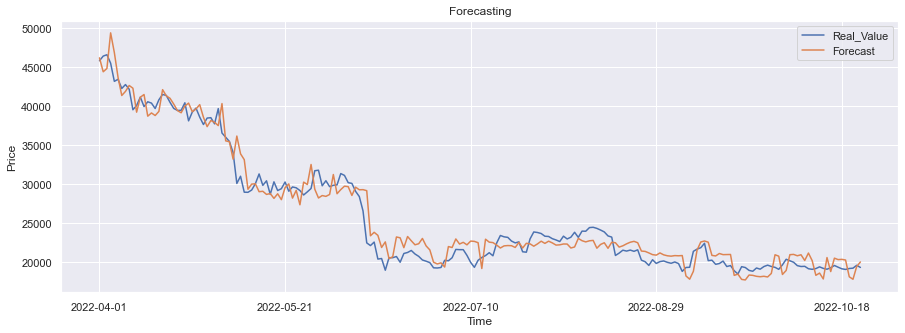

In [37]:
gbr = GradientBoostingRegressor(loss = 'squared_error',
                                criterion = 'friedman_mse',
                                warm_start = True,
                                verbose = 1,
                                learning_rate = 0.3,
                                max_depth = 3,
                                min_samples_leaf = 0.1,
                                min_samples_split = 0.4,
                                n_estimators = 900,
                                subsample = 1)

All_Func.Eval_Model(model=gbr, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

<BarContainer object of 15 artists>

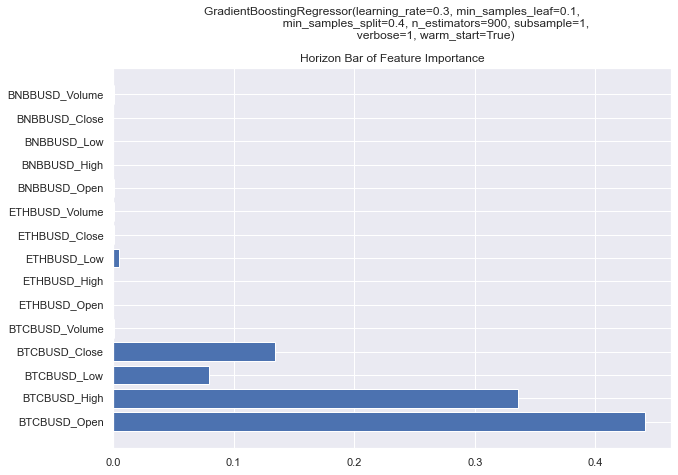

In [38]:
plt.figure(figsize=(10,7))
plt.title("{}\n\nHorizon Bar of Feature Importance".format(gbr))
plt.barh(gbr.feature_names_in_, gbr.feature_importances_)

# Sequential Model

In [11]:
from keras.models import Model, load_model, Sequential
from keras.layers import Input,GRU,Dropout,Dense,Bidirectional

In [33]:
model = Sequential()

In [46]:
model=Sequential()
model.add(Dense(3, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(27, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),verbose=1,epochs=100)

Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 532490784.0000 - val_loss: 525632128.0000
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 464473344.0000 - val_loss: 319362624.0000
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 413923712.0000 - val_loss: 300806752.0000
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 390378304.0000 - val_loss: 376543488.0000
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 378232800.0000 - val_loss: 390852896.0000
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 360143424.0000 - val_loss: 439738752.0000
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 345860320.0000 - val_loss: 500865536.0000
Epoch 8/100
26/26 [==============================] - 0s 3ms/step - loss: 341354720.0000 - val_loss: 376966880.0000
Epoch 9/100
26/26 [==============================] - 0s 4ms/step - loss: 324836

In [47]:
pred=model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [48]:
a = pd.DataFrame(pred, index=X_test.index, columns=['Model'])
a['Real_Value'] = y_test
a

,Model,Real_Value
Open time,,
2022-04-01,45115.460938,45825.73
2022-04-02,45255.589844,46420.23
2022-04-03,45409.917969,46594.23
2022-04-04,45759.500000,45506.78
2022-04-05,45792.601562,43177.71
...,...,...
2022-10-19,7604.632812,19041.73
2022-10-20,5686.779297,19164.41
2022-10-21,3435.955811,19205.39


In [49]:
import math

y_actual = a['Real_Value']
y_predicted = a['Model']

MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

9770.646185015556


---